# Homework 6 
## AMATH 584 with Dr. Kutz 
### by Jordan Ehrman ehrmanj@uw.edu

In [1]:
from mnist import MNIST
import numpy as np

In [2]:
mndata = MNIST('.')

In [3]:
trainimages, trainlabels = mndata.load_training()

In [4]:
testimages, testlabels = mndata.load_testing()

Visualizing a testcase so I know what I'm getting into 

In [5]:
testcase = np.reshape(testimages[0], (-1, 28))

In [6]:
np.shape(testcase)

(28, 28)

In [7]:
import matplotlib.pyplot as plt

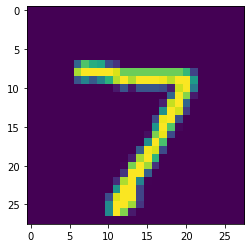

In [8]:
plt.imshow(testcase)

In [9]:
testlabels[0]

7

Cool! So reshaping the testimages vector into a 28x28 array gives an image of a handwritten digit, and the label that corresponds to it is a string of the digit that the image represents 

## Question 1 - Trying different Ax = B solvers
I need to formulate the problem into an Ax = B problem. Following the instructions on the homework, I can make A a matrix of all trainimages in vector form, such that each column vector can be reshaped into a 28x28 image, like we did with eigenfaces. B is then a set of label vectors. So I need to make matrices A and B from my training set. 

In [86]:
# making A
wrongmat = np.array(trainimages)
A = wrongmat.T

In [87]:
np.shape(A)

(784, 60000)

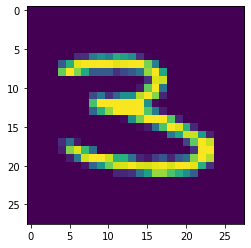

In [88]:
plt.imshow(np.reshape(A.T[7800], (-1, 28)))

In [89]:
trainlabels[7800]

3

That worked! Now for making up my label matrix

In [90]:
listofvec = []
for i in trainlabels:
    tempvec = np.zeros(10,dtype=int)
    tempvec[i]+= 1
    listofvec.append(tempvec)

In [91]:
B = np.array(listofvec).T

In [92]:
B.T[7800]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

That seems to have worked! Trying one more test case just to be sure

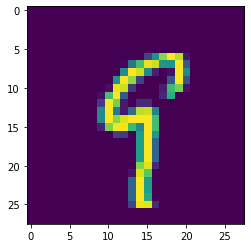

In [93]:
plt.imshow(np.reshape(A.T[54321], (-1, 28)))

In [94]:
B.T[54321]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

Yup! 
## Using an Ax = B Solver
There are a couple solvers I want to try out on this system -- pinv from np.linalg, lstsq from scipy, LinearRegression from Linear Model, Lasso, and Ridge from sklearn. I anticipate that a lot of these won't be able to handle the strange dimensionality of this case, so I'll need to do a lot of tranposing to make things match up. This will possibly give me garbage through some methods and good results through others. 

#### note - at some point during this process, I realized that my variable A was actually the transpose of what I probably should've been calling A, and the same is true for B. My code reflects this. 

### np.linalg.pinv
This will give the pseudoinverse, so then I can take A^-1 . B to get X

In [119]:
Apinv = np.linalg.pinv(A.T)

In [120]:
np.shape(Apinv)

(784, 60000)

In [121]:
Xpinv = np.dot(Apinv,B.T)

In [122]:
np.shape(Xpinv)

(784, 10)

#### running calculations that use Apinv.A ends up killing my kernel, so I'll come back to this if I need to 
### scipy.lstsq

In [95]:
import scipy.linalg

In [99]:
Xlstsq = scipy.linalg.lstsq(A.T,B.T)[0].

In [102]:
np.shape(Xlstsq)

(784, 10)

### linear_model.LinearRegression

In [104]:
import sklearn.linear_model

In [110]:
Xlinregfunc = sklearn.linear_model.LinearRegression().fit(A.T,B.T)

In [114]:
Xlinreg = Xlinregfunc.coef_.T

In [115]:
np.shape(Xlinreg)

(784, 10)

In [116]:
np.shape(Xlinreg[0])

(10,)

## linear_model.Lasso

In [129]:
lassofunc = sklearn.linear_model.Lasso(alpha=1)
lassofunc.fit(A.T,B.T)
Xlasso = lassofunc.coef_.T

In [130]:
np.shape(Xlasso)

(784, 10)

## linear_model.Ridge

In [136]:
ridgefunc = sklearn.linear_model.Ridge(alpha=1)
ridgefunc.fit(A.T,B.T)
XRidge = ridgefunc.coef_.T

In [137]:
np.shape(XRidge)

(784, 10)

### We've got five different types of X matrix! Let's visualize all of them. 
## Question 2 - Visualizing and Determining most important pixels
### We can visualize for all numerals by summing up all 10 rows

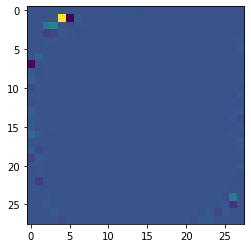

In [150]:
plt.imshow(np.reshape(Xpinv.sum(axis=1, dtype='float'), (-1, 28)))

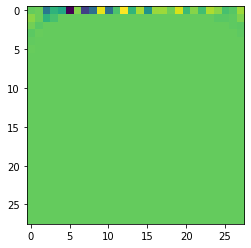

In [151]:
plt.imshow(np.reshape(Xlstsq.sum(axis=1, dtype='float'), (-1, 28)))

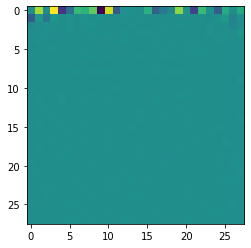

In [152]:
plt.imshow(np.reshape(Xlinreg.sum(axis=1, dtype='float'), (-1, 28)))

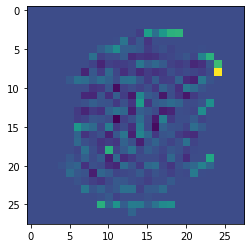

In [153]:
plt.imshow(np.reshape(Xlasso.sum(axis=1, dtype='float'), (-1, 28)))

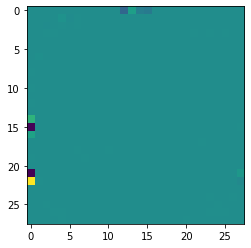

In [155]:
plt.imshow(np.reshape(XRidge.sum(axis=1, dtype='float'), (-1, 28)))

## The lasso function seems to be the only function that calculated the X the way we expected it to -- given that the other functions don't seem to be dependent on the pixels in the middle of the image (where, presumably, the drawing of the numeral lives). So, the pixels that are most important to determining the numeral are the ones with the highest value in the Xlasso image visualized above. For fun, let's visualize each column of Xlasso, each of which should correspond to one numeral. 

### I'll address the other functions later

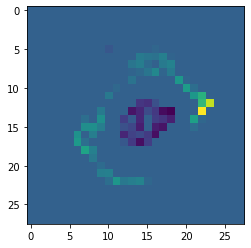

In [158]:
plt.imshow(np.reshape(Xlasso.T[0], (-1, 28)))
#zero

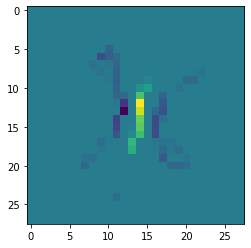

In [160]:
plt.imshow(np.reshape(Xlasso.T[1], (-1, 28)))
#one

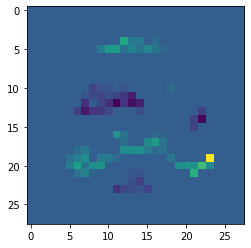

In [161]:
plt.imshow(np.reshape(Xlasso.T[2], (-1, 28)))
#two

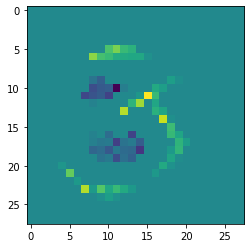

In [162]:
plt.imshow(np.reshape(Xlasso.T[3], (-1, 28)))
#three

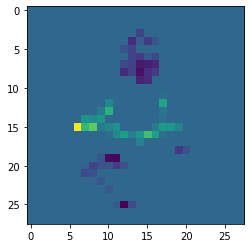

In [163]:
plt.imshow(np.reshape(Xlasso.T[4], (-1, 28)))
#four

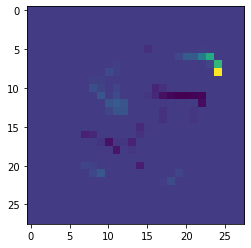

In [164]:
plt.imshow(np.reshape(Xlasso.T[5], (-1, 28)))
#five

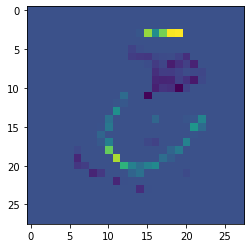

In [165]:
plt.imshow(np.reshape(Xlasso.T[6], (-1, 28)))
#six

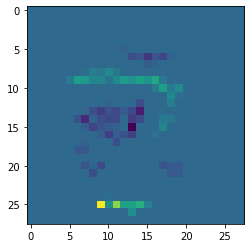

In [166]:
plt.imshow(np.reshape(Xlasso.T[7], (-1, 28)))
#seven

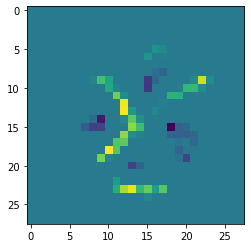

In [167]:
plt.imshow(np.reshape(Xlasso.T[8], (-1, 28)))
#eight

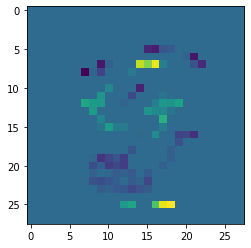

In [168]:
plt.imshow(np.reshape(Xlasso.T[9], (-1, 28)))
#nine

# IT DOES PRETTY WELL!!!! 
## that is very exciting

To find out the most important pixels, I can try to see the indices of the pixels with the largest magnitude in the summed matrix:

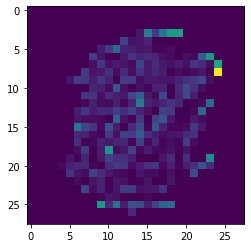

In [170]:
plt.imshow(np.reshape(abs(Xlasso.sum(axis=1, dtype='float')), (-1, 28)))

In [172]:
xlassoabsum = abs(Xlasso.sum(axis=1, dtype='float'))

### This function gives the indices of the highest magnitude pixels

In [174]:
xlassoabsum.argsort()[-10:][::-1]

array([248, 220, 103, 102, 191, 514, 709, 555,  99, 350])

## So now, a smart thing to do would be to come up with some sort of error function before varying the amount of pixels I need

In [196]:
np.dot(A.T,Xlasso)[1]

array([ 0.65115014, -0.1960315 , -0.08331509,  0.04582525, -0.18384529,
       -0.10434424, -0.02125506, -0.1014426 ,  0.02902843,  0.0215584 ])

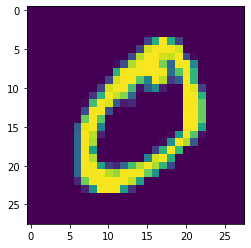

In [193]:
plt.imshow(np.reshape(A.T[1],(-1,28)))

In [198]:
B.T[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [199]:
#so a good error for this exchange would be:
np.linalg.norm(np.dot(A.T,Xlasso)[1] - B.T[1])

0.47529205325004725

In [200]:
#comparing to two different numbers:
np.linalg.norm(np.dot(A.T,Xlasso)[0] - B.T[1])

1.106526951600976

In [201]:
#comparing to two different numbers:
np.linalg.norm(np.dot(A.T,Xlasso)[2] - B.T[1])

1.1093818339670258

In [202]:
#can I get a total error for the entire matrix? 
np.linalg.norm(np.dot(A.T,Xlasso) - B.T)

190.24333421555949

In [203]:
#comparing to a nonsense X matrix
np.linalg.norm(np.dot(A.T,abs(Xlasso)) - B.T)

373.51368348153903

### yeah that's a good error function!
## A little of Question 2, a little of Question 3
Let's try it again with the test data instead of the training data

In [204]:
wrongmat = np.array(testimages)
Atest = wrongmat.T

In [206]:
listofvec = []
for i in testlabels:
    tempvec = np.zeros(10,dtype=int)
    tempvec[i]+= 1
    listofvec.append(tempvec)
Btest = np.array(listofvec).T

In [212]:
np.linalg.norm(np.dot(Atest.T,Xlasso)-Btest.T)

77.46639341720083

In [214]:
np.linalg.norm(np.dot(Atest.T,abs(Xlasso))-Btest.T)

154.459579427843

Xlasso is a good X matrix for both the training data and the test data, reducing error by a factor of two when compared to its absolute value!

## seeing how error changes as I take away unimportant elements from Xlasso

In [227]:
from copy import deepcopy
errorlist = []
for cutoff in range(784):
    listofindices = xlassoabsum.argsort()[(-1 * cutoff - 1):][::-1]
    tempxlasso = deepcopy(Xlasso)
    for j in range(10):
        for k in range(784):
            if k not in listofindices:
                tempxlasso[k,j] = 0
    errorlist.append(np.linalg.norm(np.dot(Atest.T,tempxlasso)-Btest.T))

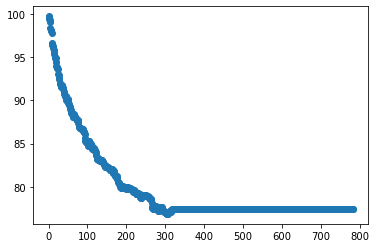

In [229]:
plt.scatter(range(784),errorlist)

## As is expected, not all pixel values are needed to get as accurate as possible of a map from Xlasso. In fact, keeping the ~301 highest magnitude pixels ends up more accurate than keeping the rest of them. 
#### Still, the error at convergence is not negligible -- it's about 74% of the entire norm. Let's see if varying alpha can get me better numbers 

In [233]:
errorlist = []
for i in range(20):
    lassofunc = sklearn.linear_model.Lasso(alpha= (i/10 + 0.1))
    lassofunc.fit(A.T,B.T)
    testxlasso = lassofunc.coef_.T
    errorlist.append(np.linalg.norm(np.dot(Atest.T,testxlasso)-Btest.T))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


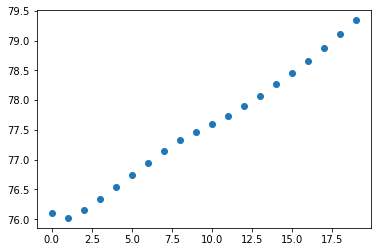

In [234]:
plt.scatter(range(20),errorlist)

Error is minimized when alpha = 0.2, let's redo the analysis for an Xlasso matrix created with an alpha of 0.2

In [235]:
lassofunc = sklearn.linear_model.Lasso(alpha= (0.2))
lassofunc.fit(A.T,B.T)
bestxlasso = lassofunc.coef_.T

In [236]:
xlassoabsum = abs(bestxlasso.sum(axis=1, dtype='float'))

In [237]:
from copy import deepcopy
errorlist = []
for cutoff in range(784):
    listofindices = xlassoabsum.argsort()[(-1 * cutoff - 1):][::-1]
    tempxlasso = deepcopy(bestxlasso)
    for j in range(10):
        for k in range(784):
            if k not in listofindices:
                tempxlasso[k,j] = 0
    errorlist.append(np.linalg.norm(np.dot(Atest.T,tempxlasso)-Btest.T))

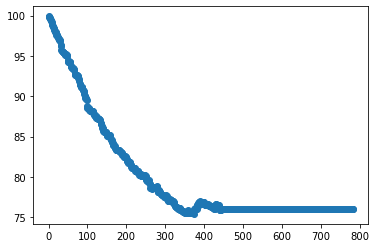

In [238]:
plt.scatter(range(784),errorlist)

Minimum error for alpha = 0.2 is now actually 75 at ~360 data points... so it looks like I'm not going to get much better with lasso :( 

For comparison's sake, let's see if this looks any different on the original data than it does for the test data

In [239]:
from copy import deepcopy
errorlist = []
for cutoff in range(784):
    listofindices = xlassoabsum.argsort()[(-1 * cutoff - 1):][::-1]
    tempxlasso = deepcopy(bestxlasso)
    for j in range(10):
        for k in range(784):
            if k not in listofindices:
                tempxlasso[k,j] = 0
    errorlist.append(np.linalg.norm(np.dot(A.T,tempxlasso)-B.T))

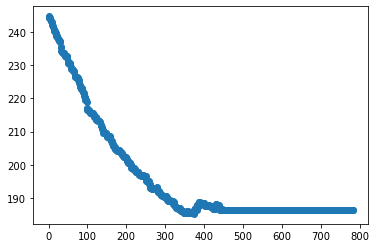

In [240]:
plt.scatter(range(784),errorlist)

It also bottoms out around the 360 point mark -- so let's visualize what this matrix looks like when only 360 points are nonzero

In [271]:
listofindices = xlassoabsum.argsort()[(-365):][::-1]
tempxlasso = deepcopy(bestxlasso)
for j in range(10):
    for k in range(784):
        if k not in listofindices:
            tempxlasso[k,j] = 0

In [272]:
conjoinedsparselasso = tempxlasso.sum(axis=1, dtype='float')
conjoinednormallasso = bestxlasso.sum(axis=1, dtype='float')

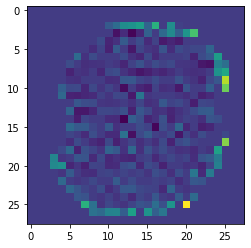

In [273]:
plt.imshow(np.reshape(conjoinedsparselasso,(-1,28)))

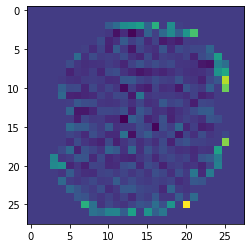

In [274]:
plt.imshow(np.reshape(conjoinednormallasso,(-1,28)))

well... they look pretty similar given that most of the ~400 points that we removed were already close to zero. Let's try that again for a different cutoff -- The steepest marginal gains in error were seen up to the 100th highest magnitude pixel. 

In [275]:
listofindices = xlassoabsum.argsort()[-100:][::-1]
print(listofindices)
tempxlasso = deepcopy(bestxlasso)
for j in range(10):
    for k in range(784):
        if k not in listofindices:
            tempxlasso[k,j] = 0

[720 277 501 305 105 707  72 249 528 741  70 192 104 718 248 743  69 564
  74  68 102 563 535 739 738 584 220 611 556 745 609 322 736 460 708 221
 716 404  67 174 693 737 101 312  97 425 620 436 509 517 439 649  71 163
 292 662 369 514 461  99 744  95 103 219 303 740 284 405 238 387 467 371
 218 153 555 370 691 463 299 627 386 124 593 427 321  66 129 151 430 131
 426 515 657 295 191 353 637 276 265 378]


In [276]:
conjoinedsparselasso = tempxlasso.sum(axis=1, dtype='float')
conjoinednormallasso = bestxlasso.sum(axis=1, dtype='float')

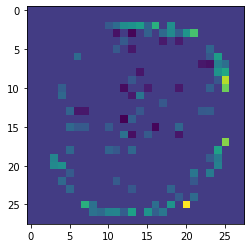

In [277]:
plt.imshow(np.reshape(conjoinedsparselasso,(-1,28)))

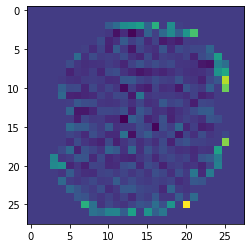

In [278]:
plt.imshow(np.reshape(conjoinednormallasso,(-1,28)))

That looks more like what I expected it to look like! Visually, there is a ring of informative pixels that lives around the reshaped lasso matrix, meaning that those are the informative pixels of the initial numeral drawings. 

## Question 3 proper - how much better is lasso at the training data than it is at the test data? 
I can normalize the error function I made up earlier so that it is independent of number of entries by dividing by the number of entries. We'll test it for 100 most informative pixels. 

In [281]:
print(np.shape(A.T))
print(np.shape(Atest.T))

(60000, 784)
(10000, 784)


In [282]:
np.linalg.norm(np.dot(A.T,tempxlasso)-B.T) / 6

36.17939491886631

In [284]:
np.linalg.norm(np.dot(Atest.T,tempxlasso)-Btest.T) 

88.7531711924657

In [288]:
np.linalg.norm(np.dot(Atest.T,np.random.rand(784,10))-Btest.T) 

4373951.600753139

So the lasso matrix with the 100 most informative pixels scores about 2.5 times better on the data that it was trained on than on the data that it was not trained on, but about 10,000 times better than a random matrix would. Not bad!

I want to try one more idea for a potential error function -- since the dtype of B is int, I could round my resulting B-estimate and see what happens. 

In [290]:
np.linalg.norm(np.rint(np.dot(A.T,tempxlasso))-B.T) / 6

40.731505687312314

In [291]:
np.linalg.norm(np.rint(np.dot(Atest.T,tempxlasso))-Btest.T) 

99.75469913743412

It got worse!!! That's funny. I wonder if that means that, while the correct integer might be the highest one in each label vector, it is more often than not less than 0.5 in the estimated label vector. Interesting!

## Question 4 - Choosing the best Pixels for Each Integer 

There is a little bit of freedom in how I could want to do this. I have friends suggesting that we should be coming up with new B matrices for each integer, but a B matrix for a single integer would just be zeros everywhere except for rows that correspond to the integer in question. That doesn't seem super exciting to me -- and I don't know how comfortable I am with a 60,000 row matrix with 9 columns of just zeros.

So instead, I will repeat my analysis from before and see if I can get 100 or under pixels of nonzero elements in my lasso matrix by choosing the most informative pixels of each integer and then stacking my new lasso matrix row-wise. 

In [294]:
from copy import deepcopy
tempxlasso = deepcopy(bestxlasso)
for j in range(10):
    listofindices = bestxlasso[:,j].argsort()[(-10):][::-1]
    for k in range(784):
        if k not in listofindices:
            tempxlasso[k,j] = 0

In [295]:
tempxlasso

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [296]:
conjoinedsparselasso = tempxlasso.sum(axis=1, dtype='float')
conjoinednormallasso = bestxlasso.sum(axis=1, dtype='float')

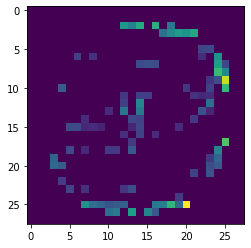

In [297]:
plt.imshow(np.reshape(conjoinedsparselasso,(-1,28)))

Noticeably different from the others! Let's see how many pixels are nonzero:

In [298]:
counter = 0 
for i in range(784):
    if conjoinedsparselasso[i] == 0:
        counter +=1
print(counter)

686


In [299]:
784-686

98

Now I can compare this sparse lasso function to the sparse lasso function that was made without looking at specific integers and see which leads to more error

In [300]:
intconsideredlasso = deepcopy(tempxlasso)

In [302]:
listofindices = xlassoabsum.argsort()[-98:][::-1]
tempxlasso = deepcopy(bestxlasso)
for j in range(10):
    for k in range(784):
        if k not in listofindices:
            tempxlasso[k,j] = 0

#### on the original data

In [305]:
np.linalg.norm(np.dot(A.T,tempxlasso)-B.T) / 6

36.57685757129902

In [306]:
np.linalg.norm(np.dot(A.T,intconsideredlasso)-B.T) / 6

35.85082306310779

### Considering the integer-specific best pixels leads to less error!!!!

#### trying it again on the test data

In [307]:
np.linalg.norm(np.dot(Atest.T,tempxlasso)-Btest.T) 

89.71667560053471

In [308]:
np.linalg.norm(np.dot(Atest.T,intconsideredlasso)-Btest.T) 

88.01150258688277

### For both cases, considering the integer-specific best pixels leads to less error!!

Let's see how this one varies with number of pixels

In [311]:
errorlist = []
for i in range(100):
    tempxlasso = deepcopy(bestxlasso)
    for j in range(10):
        listofindices = bestxlasso[:,j].argsort()[(- i - 1):][::-1]
        for k in range(784):
            if k not in listofindices:
                tempxlasso[k,j] = 0
    errorlist.append(np.linalg.norm(np.dot(Atest.T,tempxlasso)-Btest.T))

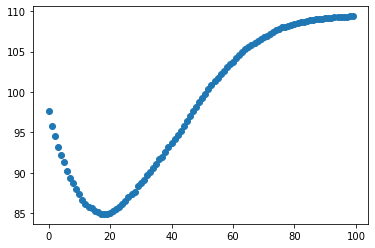

In [313]:
plt.scatter(range(100),errorlist)

Funnily enough, this one has a definite minimum at ~19 best points per numeral. I reckon that above that point, error from a pixel that is informative to one numeral but noise to another begins outweighing marginal benefit of including that pixel in the map. It bottoms out at what looks like an error of 85, which I reckon is not bad at all, given that the Btest matrix contains 10,000 label vectors. 

## Question 5 before I just mess around with the matrices til this is due

The intuitive meaning of this AX = B problem is as follows:

* The A matrix is a matrix of vectorized images of drawn numerals. The way I formulated the problem, A has 784 columns and 60000 rows. Each row stores one 784-pixel image, and there are 60000 rows for the 60000 training images

* The B matrix is a matrix of vectors that correspond to the label of each drawn numeral -- where the label is an integer that corresponds to the integer that the drawn numeral is meant to represent. My B matrix has 60,000 rows and 10 columns -- corresponding to the 60,000 different drawn numerals and the 10 possible integer values of the label. 

* The X matrix is a matrix that maps A to B -- it takes the pixels of one row of A and sorts it as components of what is expected of each label. My X matrix has 784 rows and 10 columns -- it takes in the 784 pixel values of each image-row and sorts it as components of the 10 possible labels. My X matrix was trained on the A and B training set. 

* The Atest matrix (784 by 10000) contains 10000 images that were not used to train the X matrix. If the X matrix is doing what we hope it is doing, it will be able to sort the values of the Atest matrix into the Btest matrix as well as it was able to sort the A matrix into the B matrix. That being said, my methodology was about 2.5 times worse at sorting Atest into Btest as it was able to sort A into B. 

* The Btest matrix (10 by 10000) stores the label vectors for the Atest matrix. The X matrix was trained on neither the Atest matrix nor the Btest matrix. 

From this explanation, there are a few things worth mentioning: 

* I used the X matrix that was generated by the Lasso function over the other X matrices since it seemed to be using a logic similar to what a human would use when sorting drawn numerals into corresponding integers -- columns of the Xlasso matrix could be un-vectorized and visualized as vaguely drawn numerals. Other methods may have worked with better or worse accuracy within the training set, but if they were sorting based off of anything but the visual of the numeral (such as small changes around 0 of places where apparently no numeral was drawn, which is what I was suspicious of given their visualizations) then I reckoned they would work relatively worse on the test set. If I have enough time tonight (it is now Monday) then I will see whether or not that is true. 

* We'd expect the error ratio between the AtestX=Btest and AX=B problems to shrink as the number of images included in the training data increases. If I have enough time tonight (it is now Monday) then I will see whether or not that is true. 

### Curious question 1 -- what's going on with the X matrices I got from other methods? 

Considering, for example, the XRidge matrix

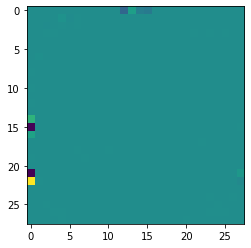

In [320]:
plt.imshow(np.reshape(XRidge.sum(axis=1, dtype='float'), (-1, 28)))

It doesn't look like it's considering pixels around where the numerals are drawn at all!! But how does it compare to Xlasso? 

In [323]:
np.linalg.norm(np.dot(A.T,XRidge) - B.T) / 6

31.28574824028657

In [324]:
np.linalg.norm(np.dot(A.T,bestxlasso) - B.T) / 6

31.0922625637821

It does very similarly in terms of error!! Is it able to handle testdata that wasn't included in the training set?

In [325]:
np.linalg.norm(np.dot(Atest.T,XRidge) - Btest.T)

77.04778254717996

In [326]:
np.linalg.norm(np.dot(Atest.T,bestxlasso) - Btest.T)

76.02069262620867

It is!!! What is going on inside of this matrix??? I will visualize each of its columns

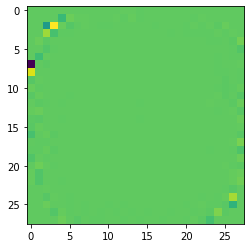

In [329]:
plt.imshow(np.reshape(XRidge.T[0], (-1, 28)))
# zero 

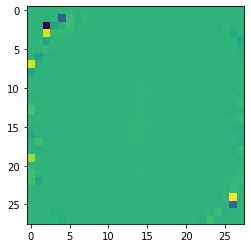

In [330]:
plt.imshow(np.reshape(XRidge.T[1], (-1, 28)))
# one 

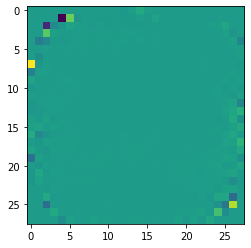

In [331]:
plt.imshow(np.reshape(XRidge.T[2], (-1, 28)))
# two 

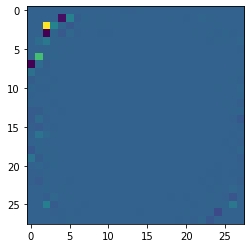

In [332]:
plt.imshow(np.reshape(XRidge.T[3], (-1, 28)))
# three 

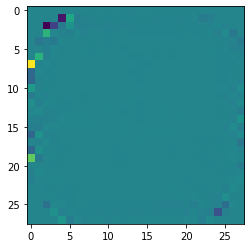

In [333]:
plt.imshow(np.reshape(XRidge.T[4], (-1, 28)))
# four 

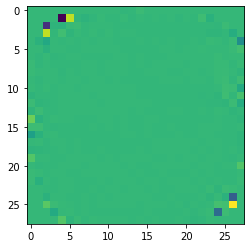

In [334]:
plt.imshow(np.reshape(XRidge.T[5], (-1, 28)))
# five 

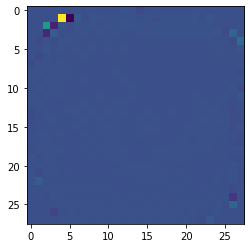

In [335]:
plt.imshow(np.reshape(XRidge.T[6], (-1, 28)))
# six 

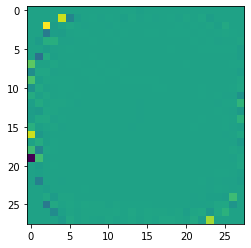

In [336]:
plt.imshow(np.reshape(XRidge.T[7], (-1, 28)))
# seven 

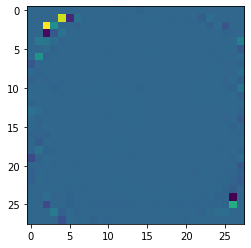

In [337]:
plt.imshow(np.reshape(XRidge.T[8], (-1, 28)))
# eight 

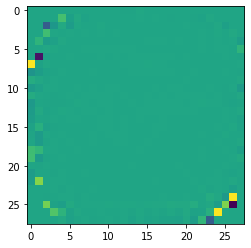

In [338]:
plt.imshow(np.reshape(XRidge.T[9], (-1, 28)))
# nine 

Nothing that looks like a numeral at all! Can it tell what numeral is drawn from the jpeg artifacts around the numeral? Let me visualize an example numeral again to see

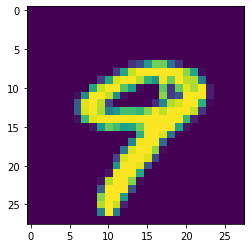

In [339]:
plt.imshow(np.reshape(Atest.T[9], (-1, 28)))

I sure don't see any jpeg artifacts around there. Let me see if maybe those pixels that look zero-valued actually have some value.

In [343]:
print(Atest.T[9][:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


They do not! Is it possible that the small magnitude pixels of the columns of the XRidge matrix have information that can't be easily visualized since they are low-magnitude? 

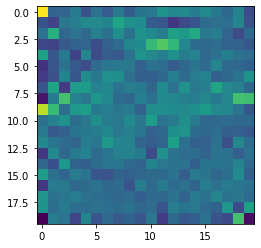

In [347]:
plt.imshow(np.reshape(XRidge.T[9], (-1, 28))[4:24,4:24])
#9, zoomed in

They do, and I might see something that looks... vaguely like a 9? Let me visualize the other columns

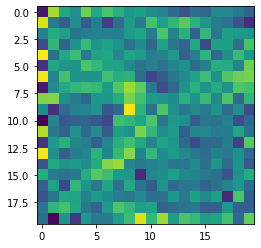

In [348]:
plt.imshow(np.reshape(XRidge.T[8], (-1, 28))[4:24,4:24])
#8, zoomed in

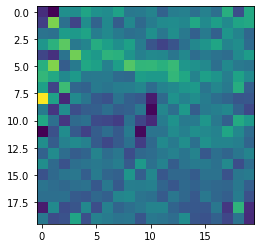

In [349]:
plt.imshow(np.reshape(XRidge.T[7], (-1, 28))[4:24,4:24])
#7, zoomed in

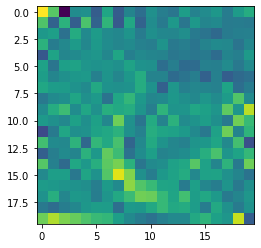

In [350]:
plt.imshow(np.reshape(XRidge.T[6], (-1, 28))[4:24,4:24])
#6, zoomed in

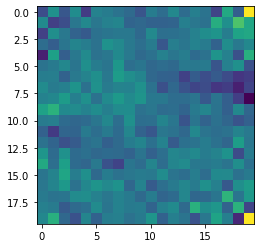

In [351]:
plt.imshow(np.reshape(XRidge.T[5], (-1, 28))[4:24,4:24])
#5, zoomed in

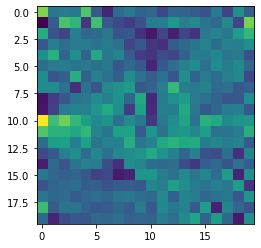

In [352]:
plt.imshow(np.reshape(XRidge.T[4], (-1, 28))[4:24,4:24])
#4, zoomed in

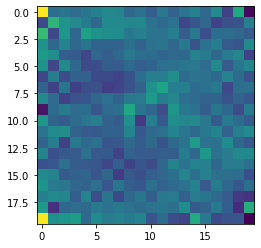

In [353]:
plt.imshow(np.reshape(XRidge.T[3], (-1, 28))[4:24,4:24])
#3, zoomed in

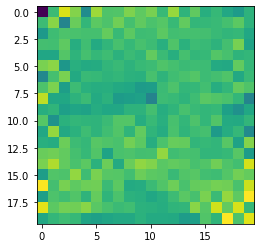

In [354]:
plt.imshow(np.reshape(XRidge.T[2], (-1, 28))[4:24,4:24])
#2, zoomed in

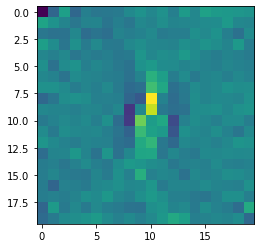

In [355]:
plt.imshow(np.reshape(XRidge.T[1], (-1, 28))[4:24,4:24])
#1, zoomed in

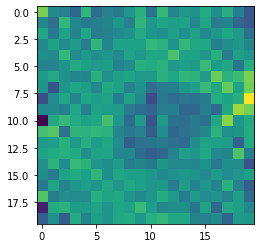

In [356]:
plt.imshow(np.reshape(XRidge.T[0], (-1, 28))[4:24,4:24])
#0, zoomed in

The longer I look at these, the more I think that this hypothesis is correct -- the largest magnitude pixels of these columns aren't necessarily the ones that are doing the numeral-identifying, but the small fluctuations present in the center of the visualized columns are the ones that identify the numeral. If this is correct, then taking only the largest magnitude pixels of these will likely not give good results relative to the largest magnitude pixels of the XLasso matrix. 

In [375]:
xridgeabsum = abs(XRidge.sum(axis=1, dtype='float'))
listofindices = xridgeabsum.argsort()[-10:][::-1]
tempxridge = deepcopy(XRidge)
for j in range(10):
    for k in range(784):
        if k not in listofindices:
            tempxridge[k,j] = 0

In [376]:
np.linalg.norm(np.dot(A.T,tempxridge) - B.T) / 6

40.82387732554387

In [377]:
np.linalg.norm(np.dot(A.T,XRidge) - B.T) / 6

31.28574824028657

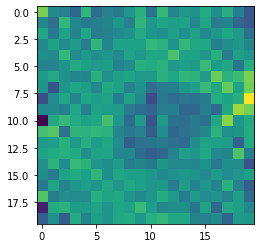

In [378]:
plt.imshow(np.reshape(XRidge.T[0], (-1, 28))[4:24,4:24])

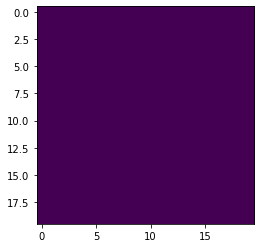

In [379]:
plt.imshow(np.reshape(tempxridge.T[0], (-1, 28))[4:24,4:24])

I was incorrect -- the error is not bad at all even when all of the pixels that I thought looked like a numeral are forced to zero. Something else is likely at play -- the statistical likelihood that any pixel on the periphery is drawn in or not may be different in each set for the different numerals. Or there is mathematical trickery afoot that I do not see with my chemistry student brain. But the other X matrices are not broken just because they do not visualize to numerals -- they just use methods that the lasso matrix does not. 

### Sanity check -- training my X matrix on different quantities of images should lead to different error

In [388]:
errorlist = []
for i in range(1,60): 
    sklearn.linear_model.Lasso(alpha=0.2)
    lassofunc.fit(A.T[:i * 1000,:],B.T[:i * 1000,:])
    Xlasso = lassofunc.coef_.T
    errorlist.append(np.linalg.norm(np.dot(Atest.T,Xlasso) - Btest.T))
    if i % 6 == 0:
        print(i)

6
12
18
24
30
36
42
48
54


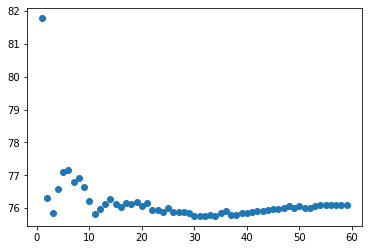

In [389]:
plt.scatter(range(1,60),errorlist)

While this looks less linear than I would have liked, it seems that the error bottoms out around 30000 training images, and then grows slightly from there. It's possible that, at above 300000 training images, more noise gets introduced to the X matrix than useful information. Why 3000 and 11000 training images lead to local minima in terms of resultant error is beyond me -- I am not sure how the A matrix is ordered, but I was operating under the assumption that it is ordered randomly, but if odd orientations or handwritings are introduced to the set later in the set, then that would lead to the pattern observed here. 

I think that is all I have to say about this assignment! It was a good class, I learned a lot!! Thanks!